# Final Preprocessing
이 코드는 각 회귀, 분류 모델에 적용하기 위한 최종  training 데이터 엑셀파일 최종 코드입니다.
> [사용한 csv Training (240119)]

- vitals_new.csv
- patients_new.csv
- reports.csv



- 1. 태어난연도 데이터를 바탕으로 나이 데이터를 만들고, 이상치 데이터는 평균으로 대체 (patients_new.csv)
- 2. 성별데이터를 바이너리로 변형 (patients_new.csv)
- 3. 중복 환자 데이터 중간값으로 처리 및 행0 이 3개 이상인 환자(열) 처리 (vitals_new.csv)
- 4. report의 현재 고혈압 환자를 제외 (reports.csv)
- 5. 모든 데이터 프레임을 합침 (최종 결과물)


## csv read

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import ast

path = os.getcwd()
print(path)

c:\Users\KANG\Downloads\Training


In [2]:
def read_csv(file_path):
    try:
        df = pd.read_csv(file_path,encoding='cp949')
        return df
    except FileNotFoundError:
        print(f"파일을 찾을 수 없습니다: {file_path}")
        return None
    except Exception as e:
        print(f"CSV 파일 읽기 오류: {e}")
        return None

In [3]:
vital_path = 'vitals_new.csv'
vital_csv = read_csv(vital_path)

patients_new_path= 'patients_new.csv'
patients_new_csv= read_csv(patients_new_path)

report_csv = read_csv('reports.csv')


## 나이 데이터 추가 후 이상치 처리 [patients_new.csv]

In [4]:

patients_new_csv['pat_age']= 2024- patients_new_csv['pat_birth']

# 'age' 열에서 0이나 1인 행의 'age' 값을 NaN으로 설정
patients_new_csv.loc[patients_new_csv['pat_age'].isin([0, 1]), 'pat_age'] = pd.NA

# 'age' 열의 평균 계산 (NaN 값을 제외하고 계산)
age_mean = int(patients_new_csv['pat_age'].mean(skipna=True))

# NaN 값을 'age' 열의 평균으로 대체
patients_new_csv['pat_age'].fillna(value=age_mean, inplace=True)

patients_new_csv.drop('pat_birth', axis=1, inplace=True)
print(patients_new_csv)

     pat_id pat_sex  pat_age
0         0       M     25.0
1         1       F     24.0
2         2       F     22.0
3         3       M     26.0
4         4       F     31.0
..      ...     ...      ...
192     192       F     34.0
193     193       F     20.0
194     194       M     47.0
195     195       M     31.0
196     196       M     52.0

[197 rows x 3 columns]


> 성별 binnary 전환 [patients_new.csv]

In [5]:
patients_new_csv['pat_sex(b)'] = patients_new_csv['pat_sex'].map({'F': 0, 'M': 1})
patients_new_csv.drop('pat_sex', axis=1, inplace=True)

## 중복 환자 데이터 처리 및 0인 데이터 채우기 [vitals_new.csv]


In [6]:
vital_csv

,pat_id,time,sbp,dbp,spo2,temp,weight,height,glucose,pulse
0,0,2023-03-14,123.181818,89.0,90.8,36.66,70.500000,169.600000,99.8,88.818182
1,0,2023-03-15,142.500000,110.5,95.0,36.80,78.680000,175.766667,100.0,102.500000
2,4,2023-03-15,148.500000,103.5,99.9,37.25,86.966667,181.533333,100.0,98.500000
3,6,2023-03-15,135.000000,87.0,97.0,37.50,85.900000,183.500000,100.0,89.000000
4,0,2023-03-21,70.000000,32.0,95.5,0.00,71.133333,169.900000,98.0,107.000000
...,...,...,...,...,...,...,...,...,...,...
423,106,2024-01-19,110.000000,69.0,99.0,35.60,50.400000,169.900000,111.0,73.000000
424,118,2024-01-19,122.000000,83.0,97.0,37.40,60.200000,172.300000,96.0,77.000000
425,130,2024-01-19,141.000000,82.0,99.0,36.80,75.800000,177.300000,81.0,65.000000
426,144,2024-01-19,117.000000,77.0,98.0,36.10,56.000000,152.300000,88.0,84.000000


In [7]:
from collections import Counter
import pandas as pd

pat_id_counts = Counter(vital_csv['pat_id'])
print(pat_id_counts)
len(pat_id_counts)


Counter({8: 31, 24: 10, 53: 10, 14: 8, 35: 8, 60: 7, 66: 7, 4: 6, 0: 4, 54: 4, 67: 4, 75: 4, 99: 4, 6: 3, 11: 3, 9: 3, 33: 3, 57: 3, 59: 3, 56: 3, 71: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 101: 3, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 3, 117: 3, 118: 3, 119: 3, 121: 3, 123: 3, 124: 3, 125: 3, 126: 3, 128: 3, 130: 3, 136: 3, 138: 3, 139: 3, 140: 3, 142: 3, 145: 3, 147: 3, 148: 3, 149: 3, 93: 3, 162: 3, 13: 2, 15: 2, 16: 2, 20: 2, 27: 2, 31: 2, 37: 2, 42: 2, 47: 2, 61: 2, 55: 2, 82: 2, 100: 2, 120: 2, 122: 2, 127: 2, 129: 2, 132: 2, 133: 2, 134: 2, 135: 2, 141: 2, 143: 2, 144: 2, 150: 2, 151: 2, 152: 2, 153: 2, 154: 2, 155: 2, 156: 2, 157: 2, 159: 2, 160: 2, 161: 2, 163: 2, 165: 2, 166: 2, 168: 2, 170: 2, 171: 2, 172: 2, 173: 2, 174: 2, 175: 2, 176: 2, 177: 2, 178: 2, 180: 2, 181: 2, 182: 2, 183: 2, 184: 2, 186: 2, 187: 2, 188: 2, 191: 2, 192: 2, 10: 1, 12: 1, 17: 1, 18: 1, 19: 1, 21: 1, 22: 1, 23: 1, 28: 1, 2

176

> - v1: 중복 제거 데이터
> - v2: 중복 포함 데이터

In [8]:
df_1=vital_csv
# 'time' 열을 datetime 타입으로 변환
df_1['time'] = pd.to_datetime(df_1['time'])

# 각 'pat_id'별로 그룹화 후, 0인 값을 중간값으로 대체하는 함수
def replace_zeros_with_median(group):
    for col in group.columns:
        if col not in ['pat_id', 'time']:  # 'pat_id'와 'time' 열 제외
            # 0이 아닌 값들의 중간값 계산
            median = group.loc[group[col] != 0, col].median()
            # 0 값을 중간값으로 대체, 중간값이 NaN이면 0을 유지
            group[col] = group[col].replace(0, median if not pd.isna(median) else 0)
    return group

# 각 'pat_id'별로 함수 적용
df = df_1.groupby('pat_id').apply(replace_zeros_with_median)

# 중복된 'pat_id' 중 'time'이 가장 최신인 데이터만 유지
# 주석 처리 시  v2 중복 포함 데이터
# df = df.sort_values(by='time', ascending=False)#.drop_duplicates(subset=['pat_id'], keep='first')



> 한 환자의 데이터가 0인 개수가 3개 이상인 데이터 삭제
- 총 167 명의 환자 데이터가 남음

In [9]:
# 데이터가 0인 열의 개수 계산
df['zero_count'] = (df.iloc[:, 2:] == 0).sum(axis=1)

# 개수가 3개 이상인 행의 pat_id 출력
pat_ids_with_3_zeros = df.loc[df['zero_count'] >= 3, 'pat_id']
# print(pat_ids_with_3_zeros)

# 개수가 3개 이하인 데이터만 남김
df = df[df['zero_count'] <= 3]
vital_csv=df
vital_csv


pat_id       time         sbp    dbp  spo2   temp     weight  \
pat_id                                                                     
0      0         0 2023-03-14  123.181818   89.0  90.8  36.66  70.500000   
       1         0 2023-03-15  142.500000  110.5  95.0  36.80  78.680000   
       4         0 2023-03-21   70.000000   32.0  95.5  36.66  71.133333   
       5         0 2023-04-13  111.000000   78.0  94.5  36.50  71.133333   
4      2         4 2023-03-15  148.500000  103.5  99.9  37.25  86.966667   
...            ...        ...         ...    ...   ...    ...        ...   
192    330     192 2024-01-12   99.000000   63.0  98.0  36.90  66.400000   
       418     192 2024-01-18  120.000000   81.0  97.0  36.70  67.400000   
193    331     193 2024-01-12  119.000000   69.0  98.0  37.20  44.700000   
194    376     194 2024-01-16  171.000000  125.0  97.0  36.80  97.600000   
196    419     196 2024-01-18  113.000000   73.0  99.0  36.20  69.500000   

                height  glucose       pulse  zero_count  
pat_id                                                   
0      0    169.600000     99.8   88.818182           0  
       1    175.766667    100.0  102.500000           0  
       4    169.900000     98.0  107.000000           0  
       5    169.900000    100.0   80.000000           0  
4      2    181.533333    100.0   98.500000           0  
...                ...      ...         ...         ...  
192    330  160.000000    101.0   64.000000           0  
       418  160.300000     98.0   69.000000           0  
193    331  156.600000     88.0   87.000000           0  
194    376  174.100000    149.0   78.000000           0  
196    419  172.600000    145.0   61.000000           0  

[419 rows x 11 columns]

> index, colunm 중복 문제 해결

In [10]:
# 'pat_id' 컬럼 이름 변경
vital_csv.rename(columns={'pat_id': 'pat_id_old'}, inplace=True)

# 이제 인덱스를 재설정할 때 충돌이 발생하지 않음
df_reset = vital_csv.reset_index()
vital_csv = df_reset.drop(['level_1','pat_id_old', 'time', 'zero_count',], axis=1)


In [11]:
vital_csv

,pat_id,sbp,dbp,spo2,temp,weight,height,glucose,pulse
0,0,123.181818,89.0,90.8,36.66,70.500000,169.600000,99.8,88.818182
1,0,142.500000,110.5,95.0,36.80,78.680000,175.766667,100.0,102.500000
2,0,70.000000,32.0,95.5,36.66,71.133333,169.900000,98.0,107.000000
3,0,111.000000,78.0,94.5,36.50,71.133333,169.900000,100.0,80.000000
4,4,148.500000,103.5,99.9,37.25,86.966667,181.533333,100.0,98.500000
...,...,...,...,...,...,...,...,...,...
414,192,99.000000,63.0,98.0,36.90,66.400000,160.000000,101.0,64.000000
415,192,120.000000,81.0,97.0,36.70,67.400000,160.300000,98.0,69.000000
416,193,119.000000,69.0,98.0,37.20,44.700000,156.600000,88.0,87.000000
417,194,171.000000,125.0,97.0,36.80,97.600000,174.100000,149.0,78.000000


## 고혈압 환자 제거(가족력, 본인 질환) 및 음주 흡연 데이터 추출 [Reports.csv] 

> report에서 general 데이터만 사용, general 데이터 중 설문조사가 가장 초기의 것만 사용

In [12]:
# 'createdAt' 열을 datetime 타입으로 변환
report_csv['createdAt'] = pd.to_datetime(report_csv['createdAt'])

# 'report_type'이 'general'인 행만 필터링
general_reports = report_csv[report_csv['report_type'] == 'general']

# 'pat_id'별로 그룹화하고, 각 그룹 내에서 'createdAt'이 가장 빠른 행만 남김
filtered_reports = general_reports.sort_values(by='createdAt').drop_duplicates(subset=['pat_id'], keep='first')

In [13]:

# 각 키별로 값을 저장할 빈 리스트를 준비
pat_ids, disease_parents, disease_histories, exercises, smokings, drinkings = [], [], [], [], [], []

# report 컬럼의 각 row에 대해 처리
for i in filtered_reports['report']:
    # 문자열을 딕셔너리로 변환
    report_dict = ast.literal_eval(i)

    # 각 키별로 값을 리스트에 추가
    pat_ids.append(report_dict.get('pat_id'))
    disease_parents.append(report_dict.get('disease_parent'))
    disease_histories.append(report_dict.get('disease_history'))
    exercises.append(report_dict.get('exercise'))
    smokings.append(report_dict.get('smoking'))
    drinkings.append(report_dict.get('drinking'))


print(disease_parents[:10])

[{'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': True, 'etc': True}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': True}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}, {'stroke': False, 'ami': False, 'hbp': False, 'dm': False, 'etc': False}]


> 가족력 파싱

In [14]:
# 원-핫 인코딩 처리 후 저장할 리스트
encoded_data = []

for item in disease_parents:
    if item is not None:
        encoded = {
            'stroke': int(item.get('stroke', False)),
            'ami': int(item.get('ami', False)),
            'hbp': int(item.get('hbp', False)),
            'dm': int(item.get('dm', False)),
            'etc': int(item.get('etc', False))
        }
    else:
        # item이 None인 경우, 딕셔너리 전체를 None으로 설정하지 않고 각 키에 대해 None 저장
        encoded = {'stroke': None, 'ami': None, 'hbp': None, 'dm': None, 'etc': None}
    encoded_data.append(encoded)

# pandas DataFrame으로 변환
df_disease_parents = pd.DataFrame(encoded_data)


> 개인 질병 기록 파싱

In [15]:
# 원-핫 인코딩 처리 후 저장할 리스트 준비
encoded_list = []

for item in disease_histories:
    if item is not None:
        encoded = {
            'stroke': int(item.get('stroke', False)),
            'ami': int(item.get('ami', False)),
            'hbp': int(item.get('hbp', False)),
            'dm': int(item.get('dm', False)),
            'covid': 1 if item.get('covid', '') else 0,
            'etc': int(item.get('etc', False))
        }
    else:
        # item이 None인 경우, 결과 리스트에도 None 추가
        encoded = {'stroke': None, 'ami': None, 'hbp': None, 'dm': None, 'covid': None, 'etc': None}
    
    encoded_list.append(encoded)

# pandas DataFrame으로 변환
df_disease_histories = pd.DataFrame(encoded_list)

> 흡연 습관 파싱

In [16]:
# 원-핫 인코딩 처리 후 저장할 리스트 준비
encoded_list = []

for item in smokings:
    if item is not None:
        # '1'번 키의 값이 문자열 '1'이나 '2'일 경우 0으로, 그 외의 경우에는 1로 인코딩
        encoded = 0 if item.get('1') in ['1', '2'] else 1
    else:
        # item이 None인 경우, 결과 리스트에도 None 추가
        encoded = None
    
    encoded_list.append(encoded)

# pandas DataFrame으로 변환
df_smokings = pd.DataFrame({'smoking': encoded_list})


> 음주 습관 파싱

In [17]:
# 원-핫 인코딩 처리 후 저장할 리스트 준비
encoded_list = []

for item in drinkings:
    if item is not None:
        # 'habit'의 'unit' 값이 "don't drink"이면 0, 그렇지 않으면 1로 인코딩
        encoded = 0 if item.get('habit', {}).get('unit', '') == "don't drink" else 1
    else:
        # item이 None인 경우, 결과 리스트에도 None 추가
        encoded = None
    
    encoded_list.append(encoded)

# pandas DataFrame으로 변환
df_drinkings = pd.DataFrame({'drinking': encoded_list})


> Nan 제거 및 리스트 저장 및 병합

In [18]:
def remove_none(df):
    """
    'pat_id'를 제외한 나머지 열에서 모든 값이 None인 행을 삭제하는 함수.
    """
    cols_except_pat_id = df.columns.drop('pat_id') 
    return df.dropna(how='all', subset=cols_except_pat_id) 

df_pat_ids = pd.DataFrame({'pat_id': pat_ids})

dataframes = [df_disease_parents, df_disease_histories, df_smokings, df_drinkings]
# 각 데이터프레임에 pat_id 열을 맨 앞에 추가 : 각 프레임 병합을 위해 필요한 작업임
for df in dataframes:
    # 이미 'pat_id' 열이 있는지 확인
    if 'pat_id' not in df.columns:
        # 'pat_id' 열이 없는 경우에만 맨 앞에 추가
        df.insert(0, 'pat_id', df_pat_ids['pat_id'])


# 각 데이터프레임에 함수 적용
disease_parents = remove_none(df_disease_parents)
disease_histories = remove_none(df_disease_histories)
smokings = remove_none(df_smokings)
drinkings = remove_none(df_drinkings)


merged_report = pd.merge(drinkings, smokings, how='inner', on='pat_id')
col=['pat_id','hbp']
merged_report = pd.merge(merged_report , disease_histories[col], how='inner', on='pat_id')
merged_report.rename(columns={'hbp': 'hbp_h',}, inplace=True)
merged_report = pd.merge(merged_report , disease_parents[col], how='inner', on='pat_id')

merged_report.rename(columns={'hbp': 'hbp_p',}, inplace=True)

merged_report_for_cor=merged_report # 전체 column의 상관계수 파악용, 고혈압 환자 제거용은 merged_report



> 고혈압 환자 제거
- 개인 질병 기록 고혈합 환자 
- 가족력 고혈압 환자 

In [19]:
# merged_report = merged_report[merged_report['hbp_h'] != 1] # 개인 질병기록
# merged_report = merged_report[merged_report['hbp_p'] != 1] # 가족력

In [20]:
merged_report

,pat_id,drinking,smoking,hbp_h,hbp_p
0,51,1,0,0,0
1,4,0,0,0,0
2,52,1,0,0,0
3,53,1,0,0,0
4,54,1,0,0,0
...,...,...,...,...,...
141,191,0,0,0,0
142,192,1,0,0,0
143,193,1,0,0,0
144,194,1,1,0,1


## patients new + vitals + reports 합치기



In [21]:
# 'pat_id' 컬럼의 데이터 타입을 int64로 변환
patients_new_csv['pat_id'] = pd.to_numeric(patients_new_csv['pat_id'], errors='coerce').astype('Int64')
vital_csv['pat_id'] = pd.to_numeric(vital_csv['pat_id'], errors='coerce').astype('Int64')
merged_report['pat_id'] = pd.to_numeric(merged_report['pat_id'], errors='coerce').astype('Int64')

# 데이터프레임 병합
merged_df = pd.merge(patients_new_csv, merged_report, how='inner', on='pat_id')
merged_df = pd.merge(merged_df, vital_csv, how='inner', on='pat_id')


> CSV 저장  

In [22]:
# # 데이터프레임을 CSV 파일로 저장
merged_df.to_csv('(Trainset)preprocessed_data_v2.csv', index=False)
print(f'Filtered data has been saved to (Trainset)preprocessed_data_v2.csv')

merged_df


Filtered data has been saved to (Trainset)preprocessed_data_v2.csv


,pat_id,pat_age,pat_sex(b),drinking,smoking,hbp_h,hbp_p,sbp,dbp,spo2,temp,weight,height,glucose,pulse
0,4,31.0,0.0,0,0,0,0,148.500000,103.500000,99.900000,37.250000,86.966667,181.533333,100.000000,98.5
1,4,31.0,0.0,0,0,0,0,129.250000,96.500000,96.000000,37.366667,71.200000,174.700000,108.000000,86.0
2,4,31.0,0.0,0,0,0,0,129.250000,96.500000,98.658333,37.366667,71.200000,173.400000,108.000000,86.0
3,4,31.0,0.0,0,0,0,0,129.250000,96.500000,97.450000,37.366667,71.200000,174.700000,108.000000,86.0
4,4,31.0,0.0,0,0,0,0,128.333333,78.333333,99.866667,37.533333,71.200000,174.700000,110.333333,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,192,34.0,0.0,1,0,0,0,99.000000,63.000000,98.000000,36.900000,66.400000,160.000000,101.000000,64.0
328,192,34.0,0.0,1,0,0,0,120.000000,81.000000,97.000000,36.700000,67.400000,160.300000,98.000000,69.0
329,193,20.0,0.0,1,0,0,0,119.000000,69.000000,98.000000,37.200000,44.700000,156.600000,88.000000,87.0
330,194,47.0,1.0,1,1,0,1,171.000000,125.000000,97.000000,36.800000,97.600000,174.100000,149.000000,78.0


In [23]:
print(merged_df.head())

   pat_id  pat_age  pat_sex(b)  drinking  smoking  hbp_h  hbp_p         sbp  \
0       4     31.0         0.0         0        0      0      0  148.500000   
1       4     31.0         0.0         0        0      0      0  129.250000   
2       4     31.0         0.0         0        0      0      0  129.250000   
3       4     31.0         0.0         0        0      0      0  129.250000   
4       4     31.0         0.0         0        0      0      0  128.333333   

          dbp       spo2       temp     weight      height     glucose  pulse  
0  103.500000  99.900000  37.250000  86.966667  181.533333  100.000000   98.5  
1   96.500000  96.000000  37.366667  71.200000  174.700000  108.000000   86.0  
2   96.500000  98.658333  37.366667  71.200000  173.400000  108.000000   86.0  
3   96.500000  97.450000  37.366667  71.200000  174.700000  108.000000   86.0  
4   78.333333  99.866667  37.533333  71.200000  174.700000  110.333333   64.0  


In [24]:
merged_df

,pat_id,pat_age,pat_sex(b),drinking,smoking,hbp_h,hbp_p,sbp,dbp,spo2,temp,weight,height,glucose,pulse
0,4,31.0,0.0,0,0,0,0,148.500000,103.500000,99.900000,37.250000,86.966667,181.533333,100.000000,98.5
1,4,31.0,0.0,0,0,0,0,129.250000,96.500000,96.000000,37.366667,71.200000,174.700000,108.000000,86.0
2,4,31.0,0.0,0,0,0,0,129.250000,96.500000,98.658333,37.366667,71.200000,173.400000,108.000000,86.0
3,4,31.0,0.0,0,0,0,0,129.250000,96.500000,97.450000,37.366667,71.200000,174.700000,108.000000,86.0
4,4,31.0,0.0,0,0,0,0,128.333333,78.333333,99.866667,37.533333,71.200000,174.700000,110.333333,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,192,34.0,0.0,1,0,0,0,99.000000,63.000000,98.000000,36.900000,66.400000,160.000000,101.000000,64.0
328,192,34.0,0.0,1,0,0,0,120.000000,81.000000,97.000000,36.700000,67.400000,160.300000,98.000000,69.0
329,193,20.0,0.0,1,0,0,0,119.000000,69.000000,98.000000,37.200000,44.700000,156.600000,88.000000,87.0
330,194,47.0,1.0,1,1,0,1,171.000000,125.000000,97.000000,36.800000,97.600000,174.100000,149.000000,78.0


## Data analysis

> 나이 분포

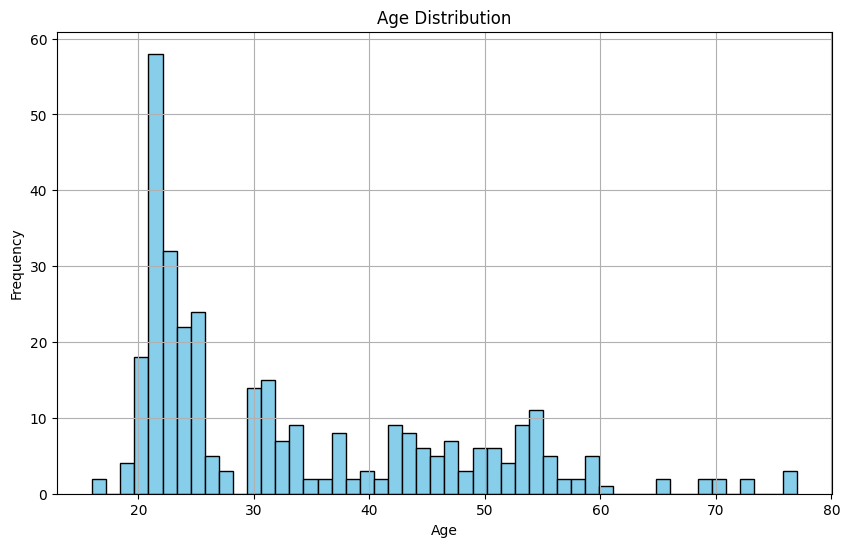

In [25]:
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
plt.hist(merged_df['pat_age'], bins=50, color='skyblue', edgecolor='black')  # 'age' 열에 대한 히스토그램
plt.title('Age Distribution')  # 그래프 제목
plt.xlabel('Age')  # x축 라벨
plt.ylabel('Frequency')  # y축 라벨
plt.grid(True)  # 격자 표시
plt.show()


> 상관계수

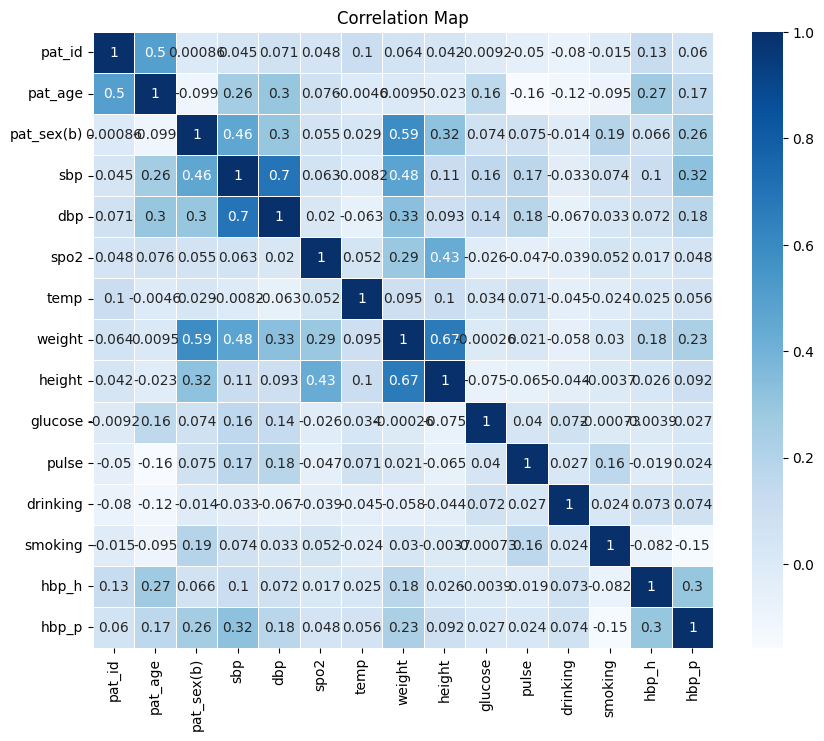

In [26]:
import seaborn as sns

patients_new_csv['pat_id'] = pd.to_numeric(patients_new_csv['pat_id'], errors='coerce').astype('Int64')
vital_csv['pat_id'] = pd.to_numeric(vital_csv['pat_id'], errors='coerce').astype('Int64')
merged_report_for_cor['pat_id'] = pd.to_numeric(merged_report_for_cor['pat_id'], errors='coerce').astype('Int64')

# 데이터프레임 병합
merged_df_for_cor = pd.merge(patients_new_csv, vital_csv, how='inner', on='pat_id')
merged_df_for_cor= pd.merge(merged_df_for_cor, merged_report_for_cor, how='inner', on='pat_id')


# 수치형 데이터만을 포함하는 컬럼 선택
numeric_df = merged_df_for_cor.select_dtypes(include=['float64', 'int64'])

# 수치형 데이터에 대한 상관관계 계산
corr = numeric_df.corr()

# 상관관계 맵 생성
plt.figure(figsize=(10, 8))  # 상관관계 맵의 크기 설정
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=.5)

# 상관관계 맵 표시
plt.title('Correlation Map')
plt.show()